In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [ ]:
columnHeadings = ['col1',
                  'N_Z', 'N', 'Z', 'A', 'El',
                  'origin',
                  'mass_excess', 'mass_excess_unc',
                  'BE_A', 'BE_A_unc',
                  'B', 'beta_decay', 'beta_decay_unc',
                  'atomic_mass_1', 'atomic_mass_2', # digits pre- and post- decimal point are in separate columns
                  'atomic_mass_unc']

# Width of each column in AME data file
AMEwidths = [1, 3, 5, 5, 5, 4, 4, 14, 11, 11, 9, 3, 11, 9, 4, 13, 11]

rawdata = pd.read_fwf('/content/massround.mas20.txt', widths=AMEwidths,
                 names=columnHeadings, skiprows=34)

# Defines inported data as data frame
df = pd.DataFrame(rawdata)
df = df[['N', 'Z','BE_A']]
df['estimated'] = df['BE_A'].str.contains('#') #Adds boolean column to the #numbers

#Finds the index of columns containing #numbers and deletes them
specind = df['estimated'] == True
df = df.drop(index=df[specind].index, axis=0)
df = df[['N', 'Z','BE_A']]

#converts data to float
df = df.astype({'BE_A': 'float64'})

#converts into MeV
df.loc[:,['BE_A']] /= 1000
df

Nuclear bindging energy formula defined by a 4 parameter Liquid Drop Model (LDM):
$E_{LDM}(N, Z) = a_{\text{vol}}A + a_{\text{surf}}A^{2/3} - a_{\text{sym}}\frac{(N - Z)^{2}}{A} - a_{\text{C}}\frac{Z(Z-1)}{A^{1/3}}$

In [ ]:
#Funcetion defining the above formula
def semf(Atot, a1, a2, a3, a4):
  Z, N = Atot
  A = N+Z
  eq = a1*A - a2*(A**(2/3)) - a3*((N - Z)**2)/A - a4*Z*(Z-1)/(A**(1/3))
  return eq

Text(0.5, 1.0, '2020 Nuclear Mass data (rounded)')

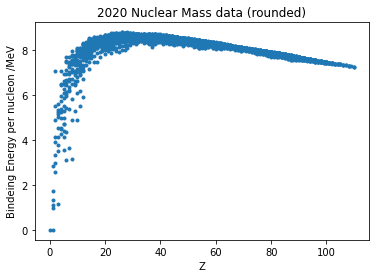

In [61]:
#PLacing the columns from the mass dataframe into numpy arrays
Z = df[['Z']].to_numpy()
N = df[['N']].to_numpy()
A = Z + N
BE_A = df[['BE_A']].to_numpy()

# fig, ax1 = plt.subplots()
# ax1.plot(Z, BE_A, '.')
# ax1.set_xlabel('Z')
# ax1.set_ylabel('Bindeing Energy per nucleon /MeV')
# ax1.set_title('2020 Nuclear Mass data (rounded)')

LDM(A) - Model only using the enen-even nuclei.

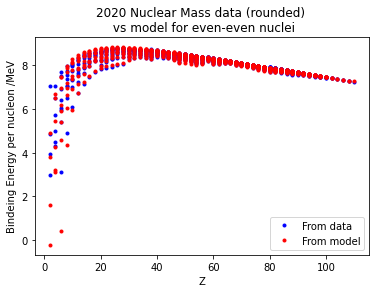

In [70]:
#Locating the even-even nuclei and placing them into corresponding numpy arrays
df_ldma = df.loc[df['Z']%2 == 0]
df_ldma = df_ldma.loc[df['N']%2 == 0]

ZA = df_ldma[['Z']].to_numpy()
NA = df_ldma[['N']].to_numpy()
AA = ZA + NA
BE_AA = df_ldma[['BE_A']].to_numpy()


#arrays for the model
x = ZA
y = semf((ZA, NA), 15.162, 15.960, 21.995, 0.680)/AA

#plots for the data in the same figure as the plots for the model
fig, ax1 = plt.subplots()
ax1.set_xlabel('Z')
ax1.set_ylabel('Bindeing Energy per nucleon /MeV')
ax1.set_title('2020 Nuclear Mass data (rounded) \n vs model for even-even nuclei')

ax1.plot(ZA, BE_AA, '.b', label='From data')
ax1.plot(x ,y, '.r', label='From model')
ax1.legend()

LDM(L) - Model only using the light nuclei (Z<40 and N<50).

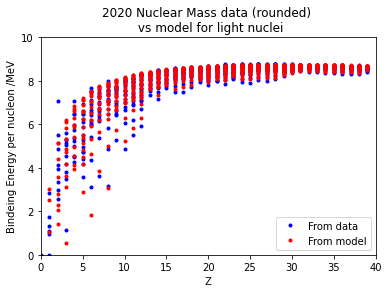

In [69]:
#Locating the light nuclei and placing them into corresponding numpy arrays
df_ldml = df.loc[df['Z'] < 40]
df_ldml = df_ldml.loc[df['N'] < 50]


ZL = df_ldml[['Z']].to_numpy()
NL = df_ldml[['N']].to_numpy()
AL = ZL + NL
BE_AL = df_ldml[['BE_A']].to_numpy()

x = ZL
y = semf((ZL, NL), 14.050, 13.877, 17.054, 0.534)/AL


#plots for the data in the same figure as the plots for the model
fig, ax1 = plt.subplots()
ax1.set_xlabel('Z')
ax1.set_ylabel('Bindeing Energy per nucleon /MeV')
ax1.set_title('2020 Nuclear Mass data (rounded) \n vs model for light nuclei')

ax1.plot(ZL, BE_AL, '.b', label='From data')
ax1.plot(x ,y, '.r', label='From model')

ax1.set_ylim([0, 10])
ax1.set_xlim([0, 40])
ax1.legend()

LDM(H) - Model only using the Heavy nuclei (Z>50 and N>80).

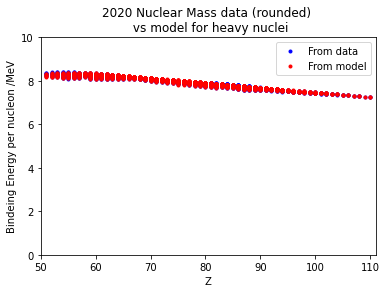

In [71]:
#Locating the heavy nuclei and placing them into corresponding numpy arrays
df_ldmh = df.loc[df['Z'] > 50]
df_ldmh = df_ldmh.loc[df['N'] > 80]


ZH = df_ldmh[['Z']].to_numpy()
NH = df_ldmh[['N']].to_numpy()
AH = ZH + NH
BE_AH = df_ldmh[['BE_A']].to_numpy()


x = ZH
y = semf((ZH, NH), 15.221, 15.873, 22.502, 0.690)/AH


#plots for the data in the same figure as the plots for the model
fig, ax1 = plt.subplots()
ax1.set_xlabel('Z')
ax1.set_ylabel('Bindeing Energy per nucleon /MeV')
ax1.set_title('2020 Nuclear Mass data (rounded) \n vs model for heavy nuclei')

ax1.plot(ZH, BE_AH, '.b', label='From data')
ax1.plot(x ,y, '.r', label='From model')

ax1.set_ylim([0, 10])
ax1.set_xlim([50, 111])
ax1.legend()